In [34]:
  print("Roey Graif id:315111401\nAmit Hai Bussani id:208384123")

Roey Graif id:315111401
Amit Hai Bussani id:208384123



# Introduction to Digital Image Processing 361.1.4751
# Exercise 2 - Color Spaces

For any questions regarding this assignment, please refer to the course forum on the Moodle website. For personal questions *only* please email  asaliam@bgu.ac.il




---

**You are allowed to add or remove cells as needed. Please ensure all cells are executed before submitting, and verify that all outputs are included in your submission !**

---

**Note** : Whenever showing the different channels, use a colormap if needed
(and only if needed!)



# 1. RGB and Grayscale (20 points)
In this exercise we will examine the relation between the grayscale and RGB image.


1.1 Read the image

*   List item
*   List item

"picasso.jpg". Convert the image to “double” and normalize to the range [ 0 , 1 ].

In [35]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

image_path = '/content/gdrive/My Drive/HW2/picasso.jpg' #Reading the picture
image = cv2.imread(image_path)
image_normalized = image.astype(np.float64) / 255.0
#Converts the image from integer values to float32 values ​​(decimal numbers) and divides all pixel values ​​by 255.0, to bring the domain of pixel values ​​into the range [1,0]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
max_value = np.max(image)
print( max_value) # Checking the maximum value of the function before normalization


255


1.2 Display the image with the ```matplotlib.pyplot.imshow( )``` function.


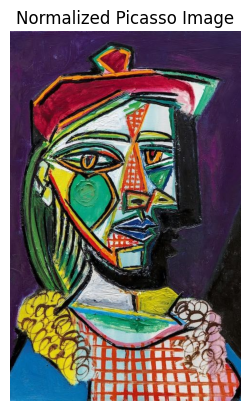

In [37]:
image_rgb = image_normalized[:, :, ::-1] #Changing the order of the channels BGR to RGB
plt.imshow(image_rgb)
plt.title("Normalized Picasso Image")
plt.axis("off")
plt.show()

1.3 Extract the separate R, G and B channels from the image and display
them.

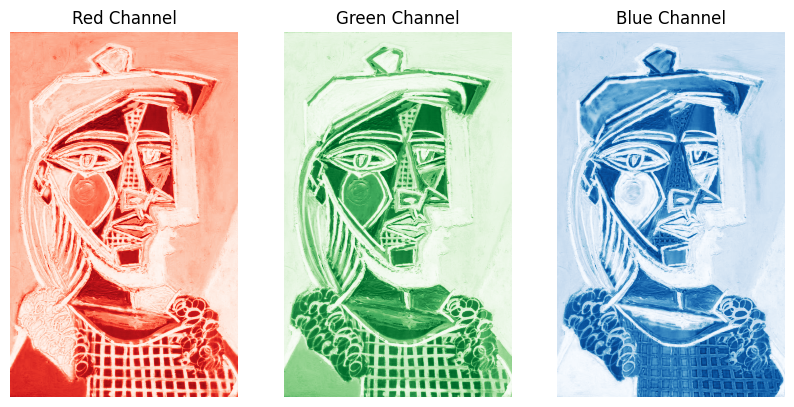

In [38]:
Red_channel = image_normalized[:, :, 0] # Show each channel separately
Green_channel = image_normalized[:, :, 1]
Blue_channel = image_normalized[:, :, 2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(Red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(Blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()

1.4 Write your own function that converts an RGB image to grayscale ```dip_rgb2gray( )```.

$$Gray = 0.2125 * R + 0.7154 * G + 0.0721 * B$$



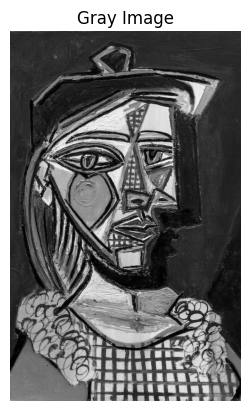

In [39]:
def dip_image_normalized_to_gray(image_normalized): #We will first convert the image to R ,G ,B channels and then calculate the gray image according to the formula and represent it at the end
    R = image_normalized[:, :, 0]
    G = image_normalized[:, :, 1]
    B = image_normalized[:, :, 2]
    gray = 0.2125 * R + 0.7154 * G + 0.0721 * B
    return gray

gray_image = dip_image_normalized_to_gray(image_normalized)
plt.imshow(gray_image, cmap='gray')
plt.title("Gray Image")
plt.axis("off")
plt.show()

1.5 Compare your results to the ```skimage.color.rgb2gray( )``` function.
Use some **measure** to show that the images are similar

In [40]:
from skimage.color import rgb2gray
from skimage.metrics import mean_squared_error

gray_skimage = rgb2gray(image_normalized)
mse = mean_squared_error(gray_image, gray_skimage)
print(f"Mean Squared Error (MSE): {mse}")

#Mean Squared Error (MSE): 4.711127443152796e-34 ,We got a very small number in MSE, which indicates a very high accuracy between the function we prepared and the built-in function in the library




Mean Squared Error (MSE): 4.711127443152796e-34


# 2. Additive vs Subtractive Color space (20 points)
In this exercise we will examine the difference between additive and subtractive
color spaces. We will examine the visual properties of the CYMK colorspace


*2.1* Briefly explain about the CYMK color space.

The CMYK color model is a subtractive color model consisting of four colors: cyan (C), magenta (M), yellow (Y), and black (key). Unlike the RGB model, where colors are created by adding light, CMYK produces colors by subtracting portions of white light. Each ink absorbs desired wavelengths and reflects the rest, creating the resulting colors. The combination of cyan, magenta, and yellow theoretically produces black, but additional black (K) ink is used to improve contrast and accuracy in printing.


2.2 Create the CYMK channels from the RGB

1.   List item
2.   List item

channels and display each
separately :

* (a) $$Black = minimum ( 1 - Red, 1 - Green, 1 - Blue )$$
* (b) $$Cyan = ( 1 - Red - Black ) / ( 1 - Black )$$
* (c) $$Magenta = ( 1 - Green - Black ) / ( 1 - Black )$$
* (d) $$Yellow = ( 1 - Blue - Black ) / ( 1 - Black )$$

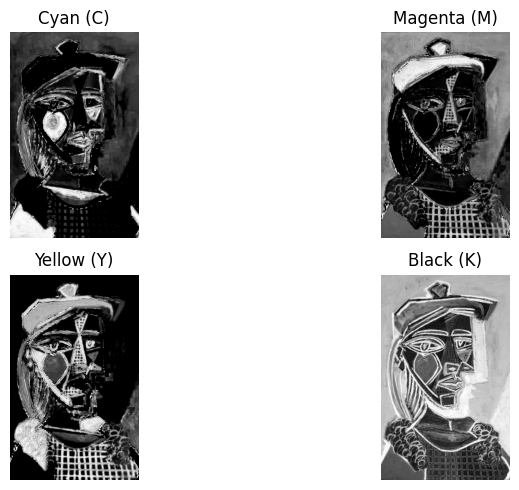

In [41]:
def dip_image_normalized_to_cmyk(image_normalized):
    R = image_normalized[:, :, 0]
    G = image_normalized[:, :, 1]
    B = image_normalized[:, :, 2]

    K = np.minimum(np.minimum(1 - R, 1 - G), 1 - B) #creating values

    C = (1 - R - K) / (1 - K + 0.00001)
    M = (1 - G - K) / (1 - K + 0.00001)
    Y = (1 - B - K) / (1 - K + 0.00001)
    return C, M, Y, K     #I added a small value to prevent division by 0.

C, M, Y, K = dip_image_normalized_to_cmyk(image_rgb)
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 4)
plt.imshow(K, cmap='gray')
plt.title("Black (K)")
plt.axis("off")

plt.subplot(2, 2, 1)
plt.imshow(C, cmap='gray')
plt.title("Cyan (C)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(M, cmap='gray')
plt.title("Magenta (M)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(Y, cmap='gray')
plt.title("Yellow (Y)")
plt.axis("off")

plt.tight_layout()
plt.show()


2.3 Display the separate channels using the provided ```displayCYMK( )``` function.

> Add blockquote



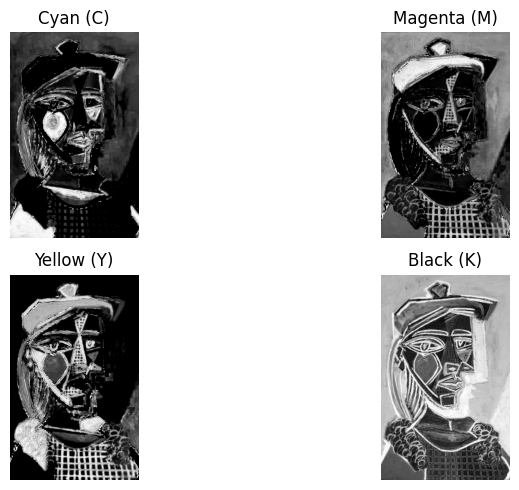

In [43]:
def displayCYMK(C, M, Y, K): #Showing the values

    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(C, cmap='gray')
    plt.title("Cyan (C)")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(M, cmap='gray')
    plt.title("Magenta (M)")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(Y, cmap='gray')
    plt.title("Yellow (Y)")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(K, cmap='gray')
    plt.title("Black (K)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

displayCYMK(C, M, Y, K)


# 3. HSV (15 points)
In this exercise we will examine the difference between the HSV and RGB representations. We will see the effects of changing the values of separate channels.




3.1 Briefly explain about the HSV color space.

The HSV color model, short for Hue, Saturation, and Value, is a cylindrical color representation based on three parameters:

Hue (H): Represents the type of color (for example, red, green, blue) and a measure in degrees (0–360 value ranges in degrees).

Saturation (S): Describes the intensity or purity of the color. Lower values ​​represent pale colors, while higher values ​​represent vivid colors (values ​​0–1).

Value (V): Indicates the overall brightness of the color. Lower values ​​correspond to darker colors, while higher values ​​correspond to brighter or full-intensity colors (0–1 value ranges).


3.2 Write your own function that converts an RGB image to HSV ```dip_rgb2hsv( )```.



In [44]:
def dip_rgb2hsv(image_rgb): # Creating the values ​​of HSV while maintaining non-division by 0
    R = image_rgb[:, :, 0]
    G = image_rgb[:, :, 1]
    B = image_rgb[:, :, 2]

    V = np.max(image_rgb, axis=2)
    diff = V - np.min(image_rgb, axis=2)
    S = np.where(V == 0, 0, diff / (V +0.00001))  #I added a small value to prevent division by 0.
    H = np.zeros_like(V)

    idx = (V == R) & (diff != 0)
    H[idx] = (60 * (G[idx] - B[idx]) / diff[idx]) % 360

    idx = (V == G) & (diff != 0)
    H[idx] = (60 * (B[idx] - R[idx]) / diff[idx]) + 120

    idx = (V == B) & (diff != 0)
    H[idx] = (60 * (R[idx] - G[idx]) / diff[idx]) + 240

    H = H / 360.0  # Normalize to [0, 1]
    hsv_image = np.stack((H, S, V), axis=2)
    return hsv_image



3.3 Convert the image to HSV and display the separate channels.





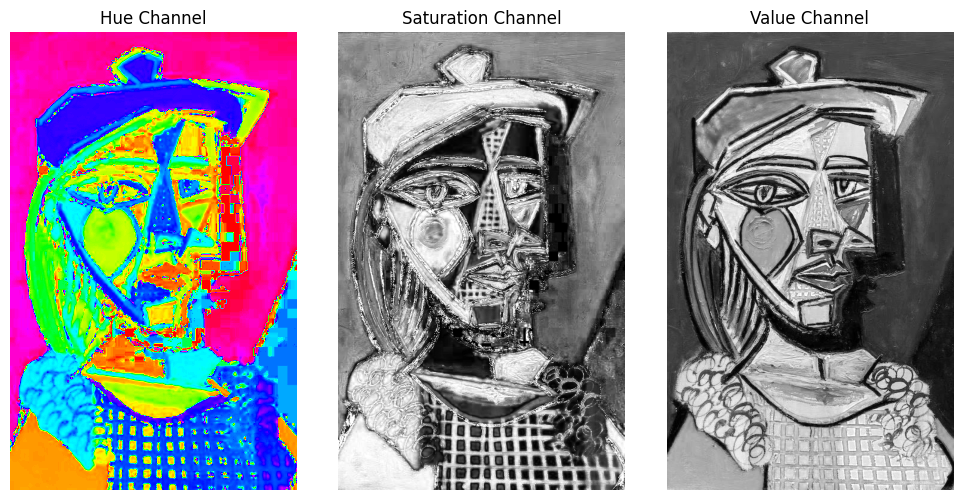

In [45]:
hsv_image = dip_rgb2hsv(image_normalized) #Displaying the values ​​of HSV
H = hsv_image[:, :, 0]
S = hsv_image[:, :, 1]
V = hsv_image[:, :, 2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(H, cmap='hsv')
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title("Value Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


3.4 Read the note in the beginning of the exercise.
 When "hsv" colormap is needed and why? What is wrong with using "hsv" colormap when not needed?


The hsv colormap is useful for displaying the Hue channel in the HSV model, as it represents the color wheel and highlights the cyclical relationship between different hues. It is suitable for color-based analysis and circularity display, but not for displaying Saturation or Value channels. In such cases, it is better to use grayscale for a more intuitive and clear display.

3.5 Compare your results to the ```skimage.color.rgb2hsv( )``` function.

In [46]:
from skimage.color import rgb2hsv #Comparing the function we built and the built-in function, the result is very small, so we see a high accuracy in the MSE sense between the two images

hsv_skimage = rgb2hsv(image_normalized)
H_image, S_image, V_image = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]
H_skimage, S_skimage, V_skimage = hsv_skimage[:, :, 0], hsv_skimage[:, :, 1], hsv_skimage[:, :, 2]
mse_H = mean_squared_error(H_image, H_skimage)
mse_S = mean_squared_error(S_image, S_skimage)
mse_V = mean_squared_error(V_image, V_skimage)

# הצגת ה-MSE
print(f"Mean Squared Error for Hue: {mse_H}")
print(f"Mean Squared Error for Saturation: {mse_S}")
print(f"Mean Squared Error for Value: {mse_V}")


Mean Squared Error for Hue: 2.4331945848148286e-33
Mean Squared Error for Saturation: 1.87079879055445e-08
Mean Squared Error for Value: 0.0


3.6 Switch the order of the RGB channels and then convert to HSV using
```dip_rgb2hsv()```. Display the separate channels. Which channels changed? Why?

We moved the channels from RGB order to BGR order, the change following the transition affected the values ​​as follows:
The Hue channel changed significantly, as it depends on the behavior between the RGB channels, and changing the order of the channels affected the calculation of the maximum and minimum value.
The Saturation channel also changed, but to a lesser extent, as it depends on the relative difference between the maximum and minimum values.
The Value channel did not change, since it is found only according to the maximum value among the channels, without being affected by the order of the channels.

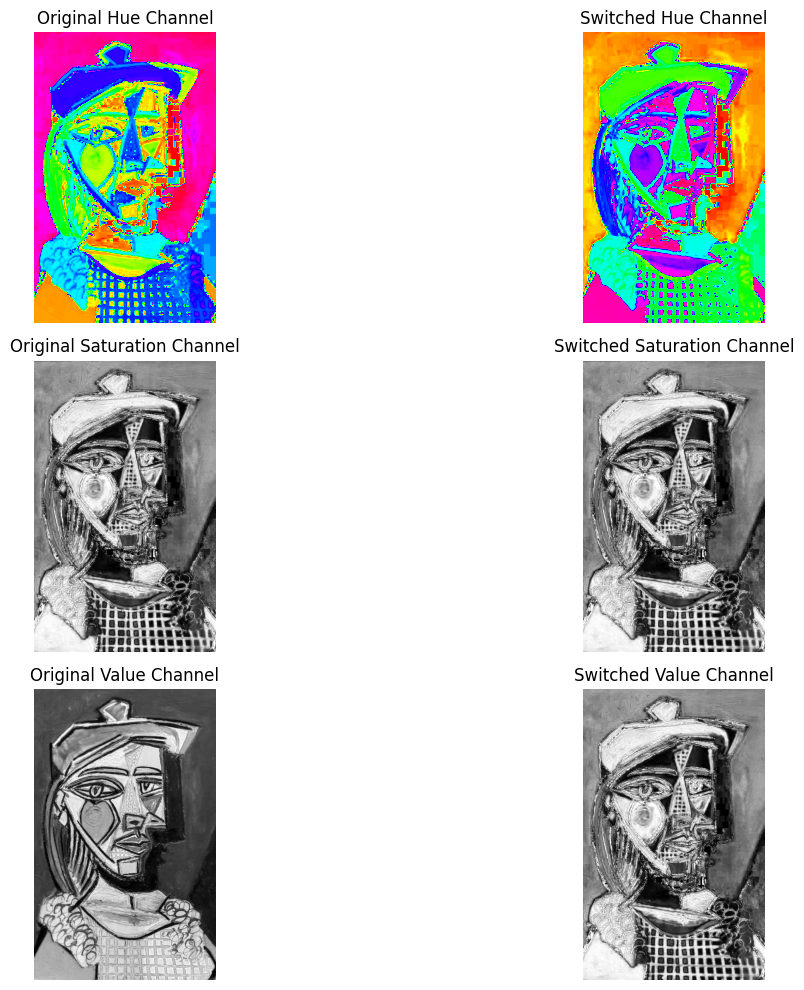

In [47]:
image_bgr_switched = np.dstack((image_rgb[:, :, 2], image_rgb[:, :, 0], image_rgb[:, :, 1]))
hsv_switched = dip_rgb2hsv(image_bgr_switched)
H_switched = hsv_switched[:, :, 0]  # (Hue)
S_switched = hsv_switched[:, :, 1]  # (Saturation)
V_switched = hsv_switched[:, :, 1]  # (Value)

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(H, cmap='hsv')
plt.title("Original Hue Channel")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(H_switched, cmap='hsv')
plt.title("Switched Hue Channel")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(S, cmap='gray')
plt.title("Original Saturation Channel")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(S_switched, cmap='gray')
plt.title("Switched Saturation Channel")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(V, cmap='gray')
plt.title("Original Value Channel")
plt.axis("off")

plt.subplot(3, 2, 6)
plt.imshow(V_switched, cmap='gray')
plt.title("Switched Value Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


# 4. L* a* b* (15 points)
In this exercise we will examine the difference between the L*a*b representations. We will see the effects of changing the values of separate channels.




4.1 Briefly explain about the L* a* b* color space.

> Add blockquote




The L* a* b*  color space is a perceptual color model that represents the way the human eye perceives colors. It has three channels: L*, which is stored in the range [0, 100], a*, which describes the color on the green-red axis, and b*, which describes the color on the blue-yellow axis. This space is device-independent and is used in various industries for color correction, color difference quantification (Delta E), and image processing, due to its affinity for the human color spectrum.



---



4.2 Convert the image to L* a* b* using the
```skimage.color.rgb2lab( )``` function and display the separate channels.

Note: This time do not normalize each channel after the manipulation.

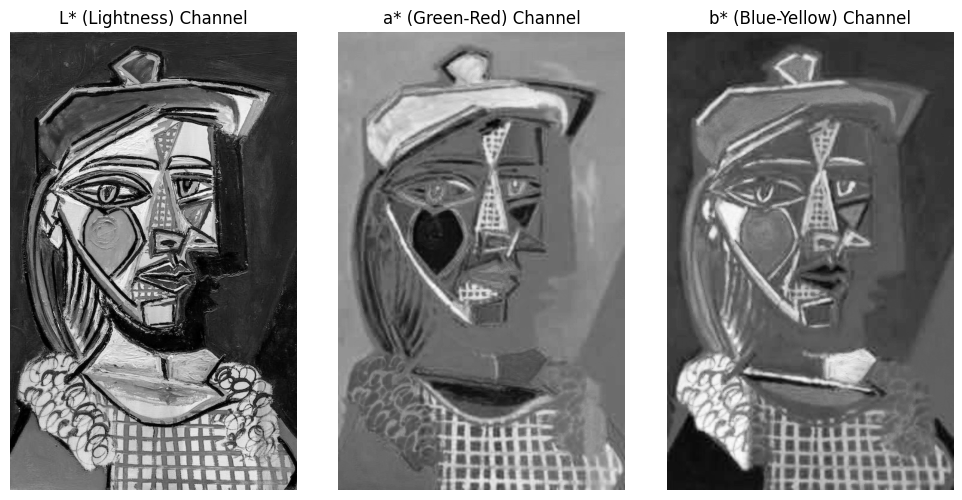

In [48]:
from skimage.color import rgb2lab
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # from question 1,without normalization
lab_image = rgb2lab(image_rgb)
#Distribution and display of images
L_channel = lab_image[:, :, 0]
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(L_channel, cmap='gray')
plt.title("L* (Lightness) Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(a_channel, cmap='gray')
plt.title("a* (Green-Red) Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_channel, cmap='gray')
plt.title("b* (Blue-Yellow) Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


# 5 Compare color spaces (10 points)
In this exercise we will examine channel manipulation for each space.


5.1 Manipulate the values and the order of the channels of each color space
and display the manipulated channels separately (you may also show the colored image after the manipulation). Choose one manipulation. Explain the
manipulations you chose and their effects.

For example:

1. Apply a linear function to one of the channels, denoted by *I* :
$$F( I ) = a · I + b.$$ Try for example $$a = -1 , b = 1$$
2. Apply a low-pass filter as in Ex.1 to one of the channels. A gaussian filter
for example.


Notes:
1. Make sure each channel of the image stays within the range [0,1]
(except for L* a* b* color space).

2. Choose manipulations that suite the color space. If your manipulation
does not change the image at all, it is not a suitable manipulation.

3. In your explanation, do not refer only to the obvious changes, i.e., ‘We
switched the R and G channels in the RGB image, and we can see that the
red flowers turned green, and the grass turned red’. Try to explain deeper
results (for example in RGB channel swap - what happened to Yellow?,
and why it makes sense?)

4. Display the results using the provided functions: ```imshowCYMK( )```, ```imshowHSV( )```,```imshowLab( )```

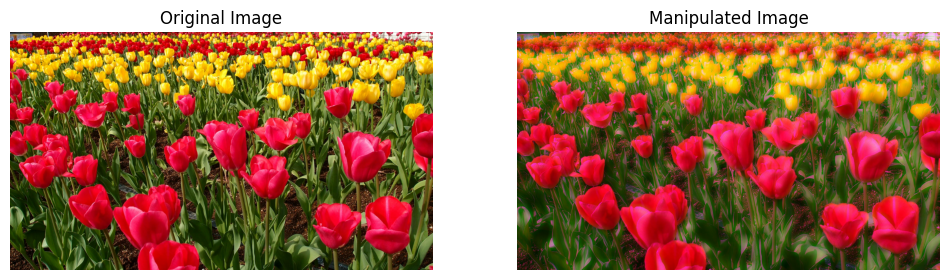

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import hsv2rgb
from skimage.color import lab2rgb


def imshowCYMK(C, Y, M, K):
    """
    This function is equivalent to imshow but displays the CYMK as a color image.
    The inputs are:
    C - an NxM matrix of type double of the cyan channel in the range [0,1]
    Y - an NxM matrix of type double of the yellow channel in the range [0,1]
    M - an NxM matrix of type double of the magenta channel in the range [0,1]
    K - an NxM matrix of type double of the black channel in the range [0,1]
    The function does not open a new figure
    """
    Ci = (1 - C)
    Yi = (1 - Y)
    Mi = (1 - M)
    Ki = (1 - K)
    RGB = np.stack((Ci * Ki, Mi * Ki, Yi * Ki), axis=-1)
    plt.imshow(RGB)


def imshowHSV(H, S, V):
    """
    This function is equivalent to imshow but displays the HSV as a color image.
    The inputs are:
    H - an NxM matrix of type double of the hue channel in the range [0,1]
    S - an NxM matrix of type double of the saturation channel in the range [0,1]
    V - an NxM matrix of type double of the value channel in the range [0,1]
    The function does not open a new figure
    """
    HSV = np.stack((H, S, V), axis=-1)
    RGB = hsv2rgb(HSV)
    plt.imshow(RGB)

def imshowLab(L, a, b):
    """
    This function is equivalent to imshow but displays the L*a*b as a color image.
    The inputs are:
    L - an NxM matrix of type double of the Luminence channel in the range [0,1]
    a - an NxM matrix of type double of the a channel in the range [0,1]
    b - an NxM matrix of type double of the b channel in the range [0,1]
    The function does not open a new figure
    """
    lab = np.stack((L, a, b), axis=-1)
    RGB = lab2rgb(lab)
    plt.imshow(RGB)

def imshowRGB(original, new_image):
    plt.figure(figsize=(12, 6))
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_normalized)
    plt.title("Original Image")
    plt.axis("off")
    # Swapped image
    plt.subplot(1, 2, 2)
    plt.imshow(swapped_image)
    plt.title("Manipulated Image")
    plt.axis("off")
    plt.show()

def linear_function(C, a, b):
    C_new = a * C + b
    C_new = np.clip(C_new, 0, 1)
    return C_new

def dip_gaussian_filter(img, k, sigma):         #Our dip_gaussian_filter(img, k, sigma) from EX1
    center = k // 2  # this is the center of the kernel
    x = np.linspace(-center, center, k)  # X and Y values from -k//2 to k//2
    y = np.linspace(-center, center, k)
    X, Y = np.meshgrid(x, y)
    kernel = np.exp(-(X**2 + Y**2) / (2 * sigma**2))  # gaussian equation
    kernel /= np.sum(kernel)  # normalize to make sure the sum of the kernel is 1
    filtered_img = cv2.filter2D(img, -1, kernel)  # convolution with the kernel
    return filtered_img

image_path = '/content/gdrive/My Drive/HW2/flowers.jpeg'
image = cv2.imread(image_path)
image_normalized = image.astype(np.float32) / 255.0
image_normalized = image_normalized[..., ::-1]    #to RGB

swapped_image = image_normalized.copy()
R = swapped_image[..., 0]  # Red channel
G = swapped_image[..., 1]  # Green channel
B = swapped_image[..., 2]  #Blue channel
#G = linear_function(G, -1, 1)
G = dip_gaussian_filter(G, 50, 100)
swapped_image[..., 0], swapped_image[..., 1], swapped_image[..., 2] = R, G, B
imshowRGB(image_normalized, swapped_image)



By applying a Gaussian blur only to the green channel, we have selectively softened areas of the image that rely heavily on green values. The roots of the flowers, which are strongly green, become noticeably blurry since their defining channel is smoothed out. In contrast, the red tones, which do not depend as much on green, remain comparatively sharper. The yellow flowers at the back, composed of both red and green, show a mixed effect. While the green component of their color is blurred, the red component remains more defined. This results in the yellow flowers appearing partially blurry, as their color is partially influenced by the blurred green channel

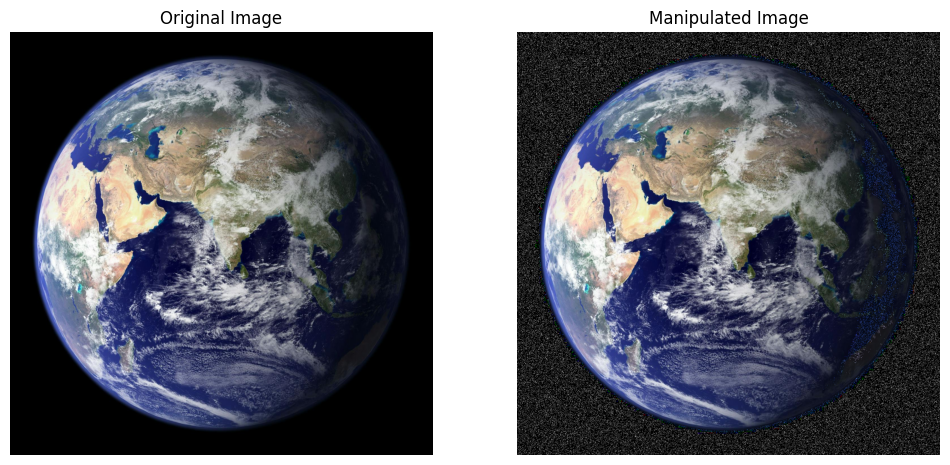

In [50]:
#CYMK

image_path = '/content/gdrive/My Drive/HW2/earth.jpeg'
image = cv2.imread(image_path)
image_normalized = image.astype(np.float32) / 255.0
image_normalized = image_normalized[..., ::-1]    #to RGB

C, M, Y, K = dip_image_normalized_to_cmyk(image_normalized)   #CYMK
#K = linear_function(K, -1, 1)
#M = dip_gaussian_filter(M, 20, 200)

random_numbers = np.random.randint(1, 10, size=K.shape)
condition1 = K > 0.9    #looking for dark pixels only (space)
condition2 = (random_numbers == 2)      #we want to chage 1 out of 10 pixels randomly
K[np.logical_and(condition1, condition2)] = 0       #appling the 2 conditions and if the pixel matches them then cange it to 0 (white)

plt.figure(figsize=(12, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_normalized)
plt.title("Original Image")
plt.axis("off")
# Swapped image
plt.subplot(1, 2, 2)
imshowCYMK(C, Y, M, K)
plt.title("Manipulated Image")
plt.axis("off")
plt.show()


The manipulation we did to K was started with a matrix where black pixels were marked as 1 and white pixels as 0. Since space is black, most values were 1. By randomly changing some of these 1s into 0s, we added small white points against the black background. This simple change made the scene look like there are bright stars shining in the darkness of space around Earth.

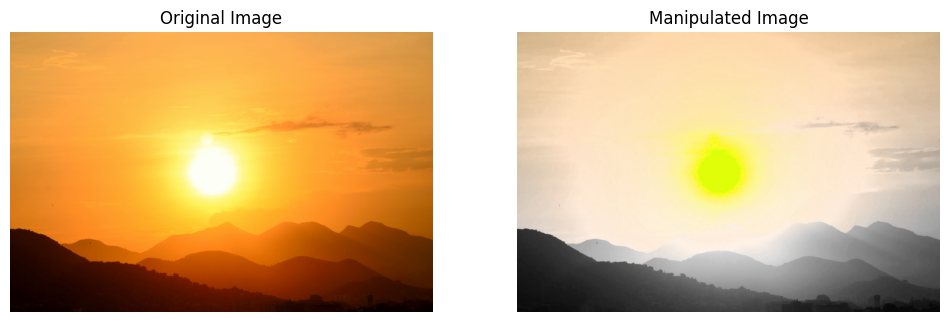

In [52]:
#HSV
image_path = '/content/gdrive/My Drive/HW2/sun.jpg'
image = cv2.imread(image_path)
image_normalized = image.astype(np.float32) / 255.0
image_normalized = image_normalized[..., ::-1]    #to RGB

hsv_image = dip_rgb2hsv(image_normalized)
H = hsv_image[:, :, 0]
S = hsv_image[:, :, 1]
V = hsv_image[:, :, 2]
S = linear_function(S, -1, 1)


plt.figure(figsize=(12, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_normalized)
plt.title("Original Image")
plt.axis("off")
# Swapped image
plt.subplot(1, 2, 2)
imshowHSV(H, S, V)
plt.title("Manipulated Image")
plt.axis("off")
plt.show()

In the HSV color space, the saturation (S) channel ranges from 0 to 1, where low values mean pale or nearly colorless areas, and high values mean vivid, strongly colored areas. By applying the transformation f(S)=−S+1, we effectively invert the saturation scale. Areas that were once pale (low S) become more vivid, while areas that were once highly saturated become pale. Using an image of the sun as an example: the sun, initially very bright and close to white with low saturation, now appears more colorful. Meanwhile, the surrounding environment, which may have been more vividly colored, appears whiter and less saturated.

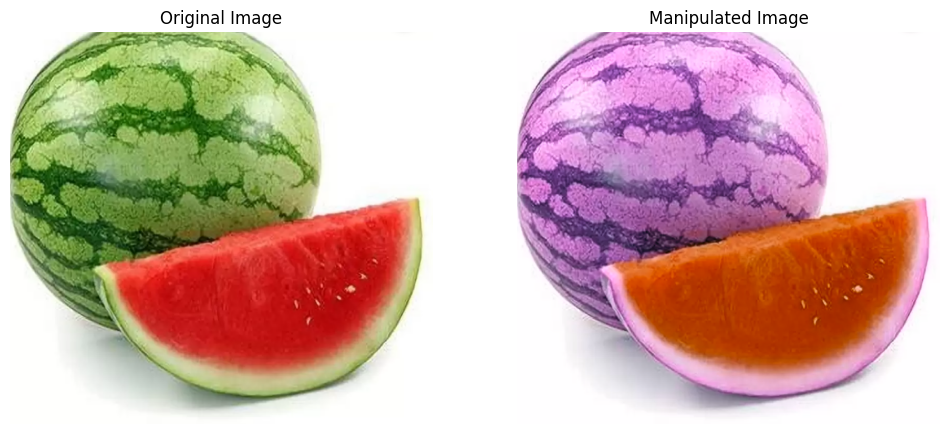

In [54]:
#LAB
image_path = '/content/gdrive/My Drive/HW2/watermelon.png'
image = cv2.imread(image_path)
image = image[..., ::-1]    #to RGB

lab_image = rgb2lab(image)
L_channel = lab_image[:, :, 0]
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]
#L_channel = dip_gaussian_filter((L_channel/100)*255, 20, 50)*(100/255)

plt.figure(figsize=(12, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
# Swapped image
plt.subplot(1, 2, 2)
imshowLab(L_channel, b_channel, a_channel)
plt.title("Manipulated Image")
plt.axis("off")
plt.show()

In the Lab color space, adjusting the a or b channel can transform how colors are perceived without having to individually alter multiple primary colors. For example, shifting the a or b channel can turn a greenish-red hue into something more blue or yellow. We chose a watermelon, which naturally has green and red tones, to clearly demonstrate how changing just one Lab channel can significantly affect the entire color balance of the image. In contrast, this kind of targeted, single-channel adjustment isn’t possible in RGB space, where achieving a similar effect would require modifying multiple channels (like both red and green) instead of just one.


# 6 Playing With Colors (20 points)

In this exercise we will try to solve real world problems with your newly acquired knowledge.


# 6.1 Color Segmentation (20 points)

6.1.1 Use color spaces and other previously learned subjects to automatically
circle the blue cap (of the soda bottle) in the "cap1/2/3.png" images enclosed to this assignment. Read notes below on how to circle.


Notes:
* Your algorithm should be robust, automatic and without any prior
knowledge about the spatial location of the cap. Meaning that you
can't assume the cap is in the bottom right of the image or build a
mask of the cap and search for the closest match in the image. Please
use the color spaces and other previously learned subjects.

* In this question you may use built-in functions to post-process a mask
and to draw a circle (e.g. ```scipy.ndimage.median filter()```,```cv2.circle()```).

* Your algorithm may fail on some cases, if it happens explain why.


(a) Read the "cap*.jpg" images and normalize them to [0 − 1].


In [55]:
image_path = '/content/gdrive/My Drive/HW2/cap1.png'    #reading the images converting them to RGB and normilazing
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap1 = image_rgb.astype(np.float32) / 255.0

image_path = '/content/gdrive/My Drive/HW2/cap2.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap2 = image_rgb.astype(np.float32) / 255.0

image_path = '/content/gdrive/My Drive/HW2/cap3.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap3 = image_rgb.astype(np.float32) / 255.0

(b) Find the blue cap of the soda bottle in the images and circle it in
each image. Explain the algorithm you've used and show the final
result images together with the binary masks you've found.
show the algorithm steps for a chosen image.
You should come up with an algorithm that finds the cap in the
images, regardless of which of the given images is used as an input.


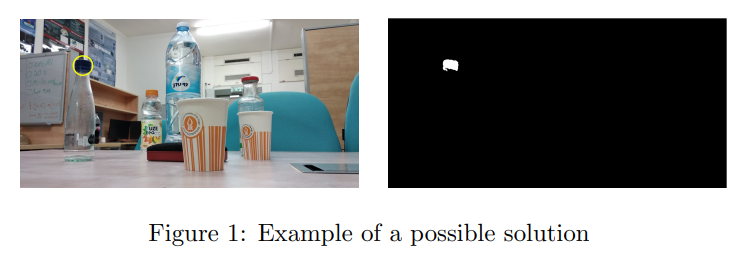

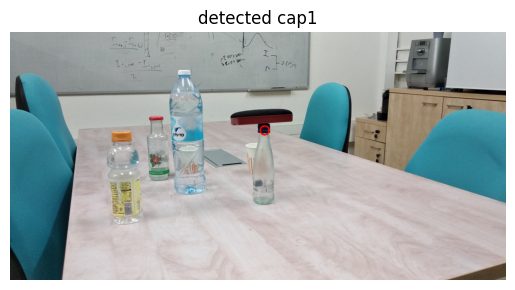

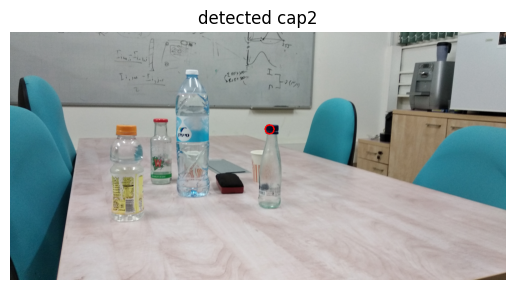

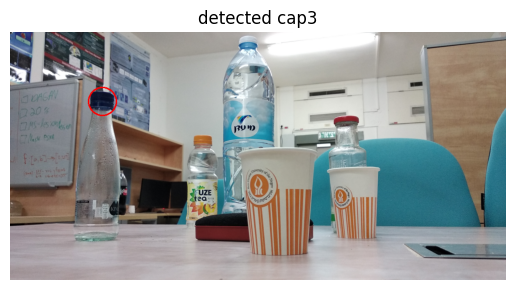

In [56]:
import cv2
import numpy as np
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

def detect_dark_blue_cap(image_normalized, i):
    image_bgr = cv2.cvtColor((image_normalized * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)  #unnormaled image in BGR
    hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)  #image in HSV because it will be easier to manipulate
    lower_blue = np.array([110, 50, 30])    #I tried a few values untill I found the perfect values to find the cap
    upper_blue = np.array([130, 255, 200])  #I tried a few values untill I found the perfect values to find the cap
    mask = cv2.inRange(hsv, lower_blue, upper_blue)   #trying to find the closest color of the blue cap
    filtered_mask = median_filter(mask, size=5)   #median filter
    kernel = np.ones((5, 5), np.uint8)
    cleaned_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_OPEN, kernel, iterations=2)  #remove all small noise
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)    #fill small white holes in black

    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    #trying to find contours
    largest_contour = max(contours, key=cv2.contourArea)    #we might find small contours so to fix this we will take the biggest
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)  #we want to circle the contour that we found
    center = (int(x), int(y))
    radius = int(radius)

    #Draw the Enclosing Circle on the Original Image
    image_with_circle = (image_normalized * 255).astype(np.uint8)
    image_with_circle_bgr = cv2.cvtColor(image_with_circle, cv2.COLOR_RGB2BGR)
    cv2.circle(image_with_circle_bgr, center, radius, (0, 0, 255), 2)
    image_with_circle_rgb = cv2.cvtColor(image_with_circle_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(image_with_circle_rgb)
    plt.title("detected cap" + str(i))
    plt.axis("off")
    plt.show()


detect_dark_blue_cap(cap1, 1)
detect_dark_blue_cap(cap2, 2)
detect_dark_blue_cap(cap3, 3)

**Answer :**
 we convert the image to the HSV color space, which is better suited for color segmentation. Using predefined HSV thresholds, it creates a binary mask isolating regions that match the color of the blue cap. A median filter is applied to the mask to reduce noise, followed by morphological opening and closing operations to clean up the mask further by removing small noise and filling gaps. The contours of the largest detected region in the cleaned mask are identified and then printed on the image

---



# 6.2 White Balancing (Optional)

At night time, when you turn on the light, some colors may look different
than they really are. In this section you
will use white balancing to remove yellow light from an image.

* Take a picture of a white page in your apartment at night time with
the lights on. Make sure to turn off the auto white balance in your
camera. If you can't find this option ask google or take a picture
with a friend's camera.

* Read about white balancing and design an algorithm for removal of
the yellow light from the picture.

* Explain the algorithm you've used and show the results.

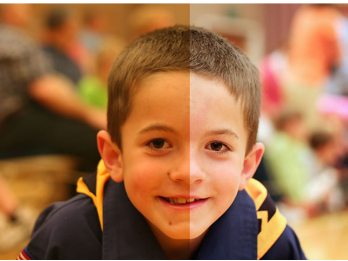

Figure 2:
 Example of yellow light influence. Photo taken from:
https://www.itsalwaysautumn.com/fix-photo-remove-yellow-color-cast.html


**Answer :**


---



# 7. Optical Illusion (Optional)

In this exercise we will trick our mind into seeing colors!
This section is not graded, but we encourage you to do it.


7.1 Read a color image using the ’imread()’ function and normalize to [0−1].


7.2 Create the negative RGB image: nRGB = 1-RGB


7.3 Create the grayscale image using your function from the first sections


7.4 Display the negative image for exactly 10 seconds and then immediately
switch to the gray scale.


7.5 Run the function and stare at the center of the image. What happens
when it switches to gray scale?

**Answer :**


---



# 8. Bonus Question
* Choose an image as you wish and manipulate it in the coolest way you can.
* Use methods from this exercise and optionally from the previous exercise. Display the initial image together with the modified image in the document. Be creative!
* One of the images will be chosen by the course staff and it's
authors will receive one bonus point to the final grade. The staff will
judge by the visual result, originality and the code.

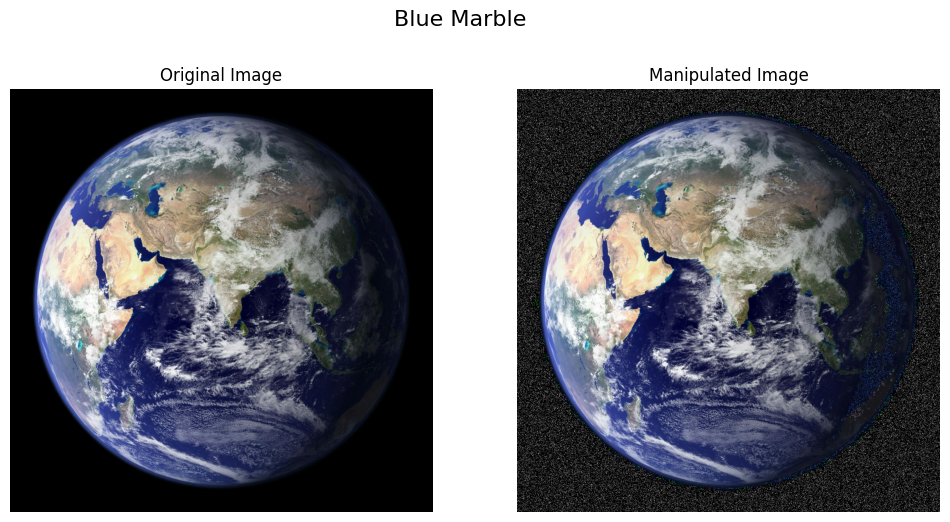

In [57]:
image_path = '/content/gdrive/My Drive/HW2/earth.jpeg'
image = cv2.imread(image_path)
image_normalized = image.astype(np.float32) / 255.0
image_normalized = image_normalized[..., ::-1]    #to RGB

C, M, Y, K = dip_image_normalized_to_cmyk(image_normalized)   #CYMK

random_numbers = np.random.randint(1, 10, size=K.shape)
condition1 = K > 0.9
condition2 = (random_numbers == 2)
K[np.logical_and(condition1, condition2)] = 0

plt.figure(figsize=(12, 6))
plt.suptitle("Blue Marble", fontsize=16)
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_normalized)
plt.title("Original Image")
plt.axis("off")
# Swapped image
plt.subplot(1, 2, 2)
imshowCYMK(C, Y, M, K)
plt.title("Manipulated Image")
plt.axis("off")
plt.show()